# Hints on Homework 3: Finite Difference Methods I

## Problem 1

We want to discretize
$$
\frac{\partial}{\partial t}u=D\cdot\frac{\partial^2}{\partial x^2}u
$$

The Crank-Nicolson method approximate the right hand side by an average, i.e.
$$
\frac{u^{n+1}_j-u^n_j}{\Delta t}=D\cdot\frac{1}{2}\cdot\frac{1}{\Delta x^2}\biggl[\biggl(u^{n}_{i,j+1}+u^{n}_{i,j-1}-2u^{n}_{i,j}\biggr)+\biggl(u^{n+1}_{i,j+1}+u^{n+1}_{i,j-1}-2u^{n+1}_{i,j}\biggr)+\biggl(u^{n+1}_{i+1,j}+u^{n+1}_{i-1,j}-2u^{n+1}_{i,j}\biggr)+\biggl(u^{n}_{i+1,j}+u^{n}_{i-1,j}-2u^{n}_{i,j}\biggr)\biggr]
$$

Let $\mu=D\frac{\Delta t}{\Delta x^2}$. The above is equivalent to
$$
(1+2\mu)u^{n+1}_{i,j}-\frac{\mu}{2}(u^{n+1}_{i,j+1}+u^{n+1}_{i,j-1}+u^{n+1}_{i+1,j}+u^{n+1}_{i-1,j})=(1-2\mu)u^{n}_{i,j}+\frac{\mu}{2}(u^{n}_{i,j+1}+u^{n}_{i,j-1}+u^{n}_{i+1,j}+u^{n}_{i-1,j})
$$

Now we can build up the propagation matrix according to above. We can align those two-dimensional discretization of $u(t,x,y)$ into column vectors, and locally assemble the matrix as
$$
\mathbf{A}\cdot
\begin{pmatrix}
u^{n+1}_{i,j-1}\\
\cdot\\
\cdot\\
\cdot\\
u^{n+1}_{i-1,j}\\
u^{n+1}_{i,j}\\
u^{n+1}_{i+1,j}\\
\cdot\\
\cdot\\
\cdot\\
u^{n+1}_{i,j+1}
\end{pmatrix}=
\mathbf{B}\cdot
\begin{pmatrix}
u^{n}_{i,j-1}\\
\cdot\\
\cdot\\
\cdot\\
u^{n}_{i-1,j}\\
u^{n}_{i,j}\\
u^{n}_{i+1,j}\\
\cdot\\
\cdot\\
\cdot\\
u^{n}_{i,j+1}
\end{pmatrix}
$$

The matrix $\mathbf{A}$ and $\mathbf{B}$ can be tricky to calculate. The point here is to analyze blockwisely, since we discretize and reshape our 2-dim data $u(x,y)$ into a column vector. Suppose that $u(x,y)$ is of size $4\times 4$ (**Use a specific number only to make it a lot easier to look at!**). For the first column $(u_{11},u_{21},u_{31},u_{41})^T$, the left hand side becomes
$$
\begin{pmatrix}
1+2\mu & -\frac{\mu}{2} & 0 & 0 &  -\frac{\mu}{2} & 0 & 0 & 0 &\cdots\\
-\frac{\mu}{2} & 1+2\mu & -\frac{\mu}{2} & 0 & 0 & -\frac{\mu}{2} & 0 & 0 & \cdots\\
0 & \frac{\mu}{2} & 1+2\mu & -\frac{\mu}{2} & 0 & 0 & -\frac{\mu}{2} & 0 & \cdots\\
0 & 0 & -\frac{\mu}{2} & 1+2\mu & 0 & 0 & 0 & -\frac{\mu}{2} & \cdots\\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots
\end{pmatrix}
$$

Notice that the blockwise identity matrix exists because we reshape the 2D data, where $u_{i,j+1}$ will be the $M$-th element after $u_{i,j}$. The subtle point is $u_{11}$ and $u_{41}$. In general all such endpoints need to be dealt with carefully. Notice also that the $\mathbf{A}$ above is of size $16\times16$, and from its form it is natural to write $\mathbf{A}$ blockwisely as
$$
\mathbf{A}=
\begin{pmatrix}
\mathbf{A_0} & -\frac{\mu}{2}\mathbf{I} & 0 & 0\\
-\frac{\mu}{2}\mathbf{I} & \mathbf{A_0} & -\frac{\mu}{2}\mathbf{I} & 0\\
0 & -\frac{\mu}{2}\mathbf{I} & \mathbf{A}_0 & -\frac{\mu}{2}\mathbf{I}\\
0 & 0 & -\frac{\mu}{2}\mathbf{I} & \mathbf{A}_0
\end{pmatrix}
$$

where $\mathbf{A}_0$ and $\mathbf{I}$ are both $4\times4$ matrices. $\mathbf{B}$ can be defined similarly.
$$
\mathbf{B}=
\begin{pmatrix}
\mathbf{B}_0 & \frac{\mu}{2}\mathbf{I} & 0 & 0\\
\frac{\mu}{2}\mathbf{I} & \mathbf{B}_0 & \frac{\mu}{2}\mathbf{I} & 0\\
0 & \frac{\mu}{2}\mathbf{I} & \mathbf{B}_0 & \frac{\mu}{2}\mathbf{I}\\
0 & 0 & -\frac{\mu}{2}\mathbf{I} & \mathbf{B}_0
\end{pmatrix}
$$

Now it suffices to incorporate the boundary conditions. According to the lecture, we use the method of **ghost nodes** by incorporating the boundary condition into the finite difference scheme. Let's still take the $4\times4$ case as an example. This can be written is a compact form as
$$
\mathbf{A}\cdot\mathbf{U}^{n+1}+\frac{-\mu}{2}
\begin{pmatrix}
2\\
1\\
1\\
2\\
1\\
0\\
0\\
1\\
\cdots\\
2\\
1\\
1\\
2
\end{pmatrix}
=\mathbf{B}\cdot\mathbf{U}^n+\frac{\mu}{2}
\begin{pmatrix}
2\\
1\\
1\\
2\\
1\\
0\\
0\\
1\\
\cdots\\
2\\
1\\
1\\
2
\end{pmatrix}
$$

Now we are ready to implement the finite difference algorithm for this 2D heat equation with initial Gaussian distributions.

In [25]:
function crank_nikolson_2DHeat(N, mu)
    # build a N^2 by N^2 matrix for Crank-Nicolson scheme of 2d heat equation
 
    # construct the N dim sparse tridiagonal A_0
    data = (0.5*mu*ones(N-1), (1-2*mu)*ones(N), 0.5*mu*ones(N-1))
    diags = (-1, 0, 1)
    A_0 = spdiagm(data, diags, N, N)
    
    # construct the N dim sparse identity I
    I = 0.5*mu*speye(N)
    
    # Finally construct A. Since we have constructed the blocks, it suffices to finish by Kronecker products.
    A_1 = speye(N)
    A_2 = spdiagm(ones(N-1), -1, N, N)
    A_3 = spdiagm(ones(N-1), 1, N, N)
    A = kron(A_1, A_0)+kron(A_2, I)+kron(A_3, I)
    
    return A
end


crank_nikolson_2DHeat (generic function with 1 method)

In [26]:
function boundary_conditions(N,mu,temp)
    # Construct boundary conditions
    B = zeros(N, N)
    B[1,:] = 1 .+ B[1,:] 
    B[N,:] = 1 .+ B[N,:] 
    B[:,1] = 1 .+ B[:,1] 
    B[:,N] = 1 .+ B[:,N] 
    
    B = reshape(0.5*mu*temp*B, (N^2, 1))    
    return B
end

boundary_conditions (generic function with 1 method)

In [28]:
A = crank_nikolson_2DHeat(4, 0.25)

16x16 sparse matrix with 64 Float64 entries:
	[1 ,  1]  =  0.5
	[2 ,  1]  =  0.125
	[5 ,  1]  =  0.125
	[1 ,  2]  =  0.125
	[2 ,  2]  =  0.5
	[3 ,  2]  =  0.125
	[6 ,  2]  =  0.125
	[2 ,  3]  =  0.125
	[3 ,  3]  =  0.5
	[4 ,  3]  =  0.125
	⋮
	[10, 14]  =  0.125
	[13, 14]  =  0.125
	[14, 14]  =  0.5
	[15, 14]  =  0.125
	[11, 15]  =  0.125
	[14, 15]  =  0.125
	[15, 15]  =  0.5
	[16, 15]  =  0.125
	[12, 16]  =  0.125
	[15, 16]  =  0.125
	[16, 16]  =  0.5

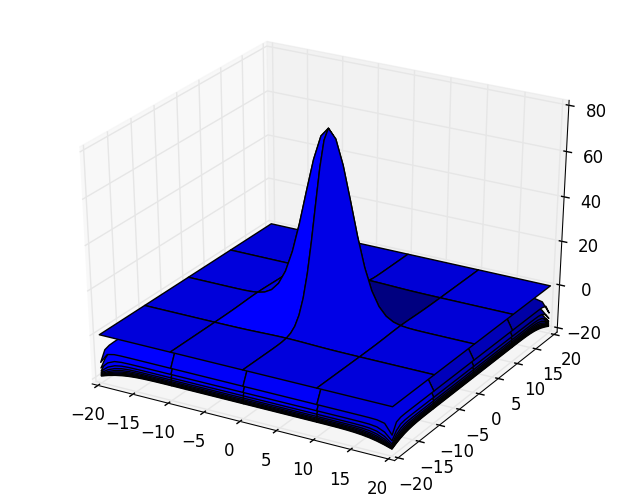

In [35]:
using PyPlot
N = 41;
mu = 0.55

# Physical set-up
L = 40. # Size of the box
Tcent = 80 # Center temperature for Gaussian initial distribution
Tside = -20 # Boundary temperatures
sigma = 20 # Expansion of the Gaussian
    
A = crank_nikolson_2DHeat(N, -mu)
B = crank_nikolson_2DHeat(N, mu)
Bl = boundary_conditions(N, -mu, Tside)
Br = boundary_conditions(N, mu, Tside)
    
# Firstly specify the initial distribution. Use Gaussian here.
y = linspace(-0.5*L, 0.5*L, N)
x = y'
    
init = Tcent*exp(-(x.*x.+y.*y)/sigma)
surf(x, y, init)
u = reshape(init, N^2, 1)

# Now the solver
for idx = 1:10
    u = A\(B*u+Br-Bl)
    v = reshape(u, (N, N))
    surf(x, y, v)
    sleep(0.01)
end

## Problem 2
This one is quite straightforward and hence omitted here.`


## Problem 3

This problem is not as hard as it seems to be, especially if we are dealing with a 1-dim case after struggling of Problem 1. The discretization process is given below.

$$
C_j\cdot\rho_j\cdot\biggl(U^{n+1}_j-U^n_j\biggr)=\frac{\Delta t}{\Delta x^2}k_j\biggl(U^n_{j+1}+U^n_{j-1}-2U^n_j\biggr)
$$

Rarrange to obtain
$$
U^{n+1}_j = \frac{\mu k_j}{C_j\rho_j} U^n_{j+1} + (1-2\frac{\mu k_j}{C_j\rho_j})U^n_j + \frac{\mu k_j}{C_j\rho_j} U^n_{j-1}
$$

This finite difference scheme now corresponds to the following matrix
$$
\mathbf{A}=
\begin{pmatrix}
1-2\frac{\mu k_1}{C_1\rho_1} & \frac{\mu k_1}{C_1\rho_1}
& 0 & 0 & 0 & 0 \\
\frac{\mu k_2}{C_2\rho_2} & 1-2\frac{\mu k_2}{C_2\rho_2} & \frac{\mu k_2}{C_2\rho_2} & 0 & 0 & 0\\
0 & \frac{\mu k_3}{{C_3\rho_3}} & 1-2\frac{\mu k_3}{C_3\rho_3} & \frac{\mu k_3}{C_3\rho_3} & 0 & 0 \\
\cdots & \cdots & \cdots & \cdots & \cdots & \cdots
\end{pmatrix}
$$

We also assumed periodic boundary conditions. Suppose that we devide the bar into $N$ parts, with $N+1$ nodes. The periodic boundary condition is forced when in each time step, one computes 
$$
U^n_1 = \mu k_1U^n_2+(C_1\rho_1-2\mu k_1)U^n_1+\mu k_1U^n_0
$$
where we set $U^n_0=U^n_N$. Similarly, for $U^n_N$, one has
$$
U^n_N = \mu k_1U^n_{N+1}+(C_1\rho_1-2\mu k_1)U^n_N+\mu k_1U^n_{N-1}
$$
But again, $U^n_{N+1} = U^n_1$.

As a result, our $\mathbf{A}$ is of the form
$$
\mathbf{A}=
\begin{pmatrix}
1-2\frac{\mu k_1}{C_1\rho_1} & \frac{\mu k_1}{C_1\rho_1}
& 0 & 0 & 0 & \frac{\mu k_1}{C_1\rho_1} \\
\frac{\mu k_2}{C_2\rho_2} & 1-2\frac{\mu k_2}{C_2\rho_2} & \frac{\mu k_2}{C_2\rho_2} & 0 & 0 & 0\\
0 & \frac{\mu k_3}{{C_3\rho_3}} & 1-2\frac{\mu k_3}{C_3\rho_3} & \frac{\mu k_3}{C_3\rho_3} & 0 & 0 \\
\cdots & \cdots & \cdots & \cdots & \cdots & \frac{\mu k_{N-1}}{C_{N-1}\rho_{N-1}}\\
\frac{\mu k_1}{C_1\rho_1} & 0 & 0 & 0 & \frac{\mu k_N}{C_N\rho_N} & 1-2\frac{\mu k_N}{C_1\rho_N}
\end{pmatrix}
$$

**Update** According to the professor, the periodic boundary case will bring a singular propagation matrix $\mathbf{A}$, and hence for simplicity you merely need to consider the trivial Dirichlet boundary conditions.

From the physics of the bar, it is natural to divide the bar into, say 30 nodes and assign **Wood** to $1:5$ and $26:30$, and **Iron** otherwise. $k$ is $10^{-3}W/cm\cdot C$ or $0.795W/cm\cdot C$, where we have changed $W/m\cdot C$ to $W/cm\cdot C$.

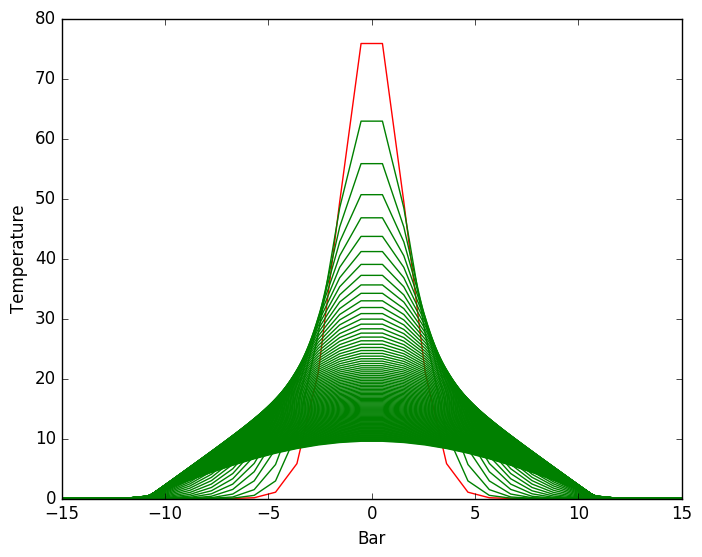

In [1]:
using PyPlot

# Physical constants
Temp = 80.
Tbd = 0.
span = 5.
N = 30
k1 = 1e-3
k2 = 0.795
C1 = 1.76
C2 = 0.45
rho1 = 0.5
rho2 = 7.9
L = 30.
# build k/C/rho
k = ones(N, 1)
k[1:5] = [k1/(C1*rho1) for i = 1:5]
k[26:30] = [k1/(C1*rho1) for i = 1:5]
k[6:25] = [k2/(C2*rho2) for i = 6:25]

# Find out the appropriate mu
mu = 0.49/maximum(k)

# Build the propagation matrix
k1 = 1.-2*mu*k
k2 = mu*k[2:N]
k3 = mu*k[1:N-1]
diag = (k2, k1, k3)
b = (-1, 0, 1)
A = spdiagm(diag, b, N, N)
B = zeros(N, 1)
B[1] = 1
B[N] = 1
B = Tbd*B    # Boundary vector

# Initialize the temperature distribution
x = linspace(-L/2, L/2, N)
init = Temp * exp(-x.^2/span)
plot(x, init, color="red")
u = init

# Now the scheme
for i = 1:100
    u = A*u + B
    plot(x, u, color = "green")
    xlabel("Bar")
    ylabel("Temperature")
    sleep(0.2)
end
